In [33]:
! pip install pandas numpy joblib matplotlib seaborn scikit-learn xgboost streamlit


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
! pip install streamlit-option-menu


  Using cached streamlit_option_menu-0.4.0-py3-none-any.whl.metadata (2.5 kB)
Using cached streamlit_option_menu-0.4.0-py3-none-any.whl (829 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
# importation des pakages de base
import pandas as pd
import numpy as np
import joblib
import pickle

# package de visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns

# package de machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

# package interface web pour l'application

import streamlit as st

In [35]:
# chargement des données 
df = pd.read_csv(r'C:\Users\HP\Downloads\Thyroid_Diff.csv')
df.head(6)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No


In [36]:
# information sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [37]:
# valeurs uniques des colonnes catégorielles
for col in df.select_dtypes(include='object').columns:
    print(f"{col} : {df[col].unique()}")


Gender : ['F' 'M']
Smoking : ['No' 'Yes']
Hx Smoking : ['No' 'Yes']
Hx Radiothreapy : ['No' 'Yes']
Thyroid Function : ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Physical Examination : ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Adenopathy : ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Pathology : ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Focality : ['Uni-Focal' 'Multi-Focal']
Risk : ['Low' 'Intermediate' 'High']
T : ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
N : ['N0' 'N1b' 'N1a']
M : ['M0' 'M1']
Stage : ['I' 'II' 'IVB' 'III' 'IVA']
Response : ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']
Recurred : ['No' 'Yes']


In [38]:
# colonnes dupliquées
df.duplicated().sum()

np.int64(19)

In [39]:
# supprimer les colonnes dupliquées
df.drop_duplicates(inplace=True)

In [40]:
# statistiques descriptives variables categorielles
df.describe(include='object').T


,count,unique,top,freq
Gender,364,2,F,293
Smoking,364,2,No,315
Hx Smoking,364,2,No,336
Hx Radiothreapy,364,2,No,357
Thyroid Function,364,5,Euthyroid,313
Physical Examination,364,5,Multinodular goiter,135
Adenopathy,364,6,No,258
Pathology,364,4,Papillary,271
Focality,364,2,Uni-Focal,228
Risk,364,3,Low,230


In [41]:
# valeurs manquantes
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

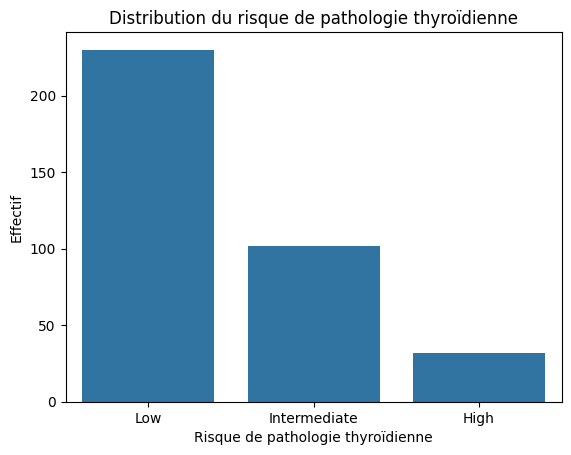

In [42]:
# analyse exploratoire
sns.countplot(x='Risk', data=df)
plt.xlabel('Risque de pathologie thyroïdienne')
plt.ylabel('Effectif')
plt.title('Distribution du risque de pathologie thyroïdienne')
plt.show()

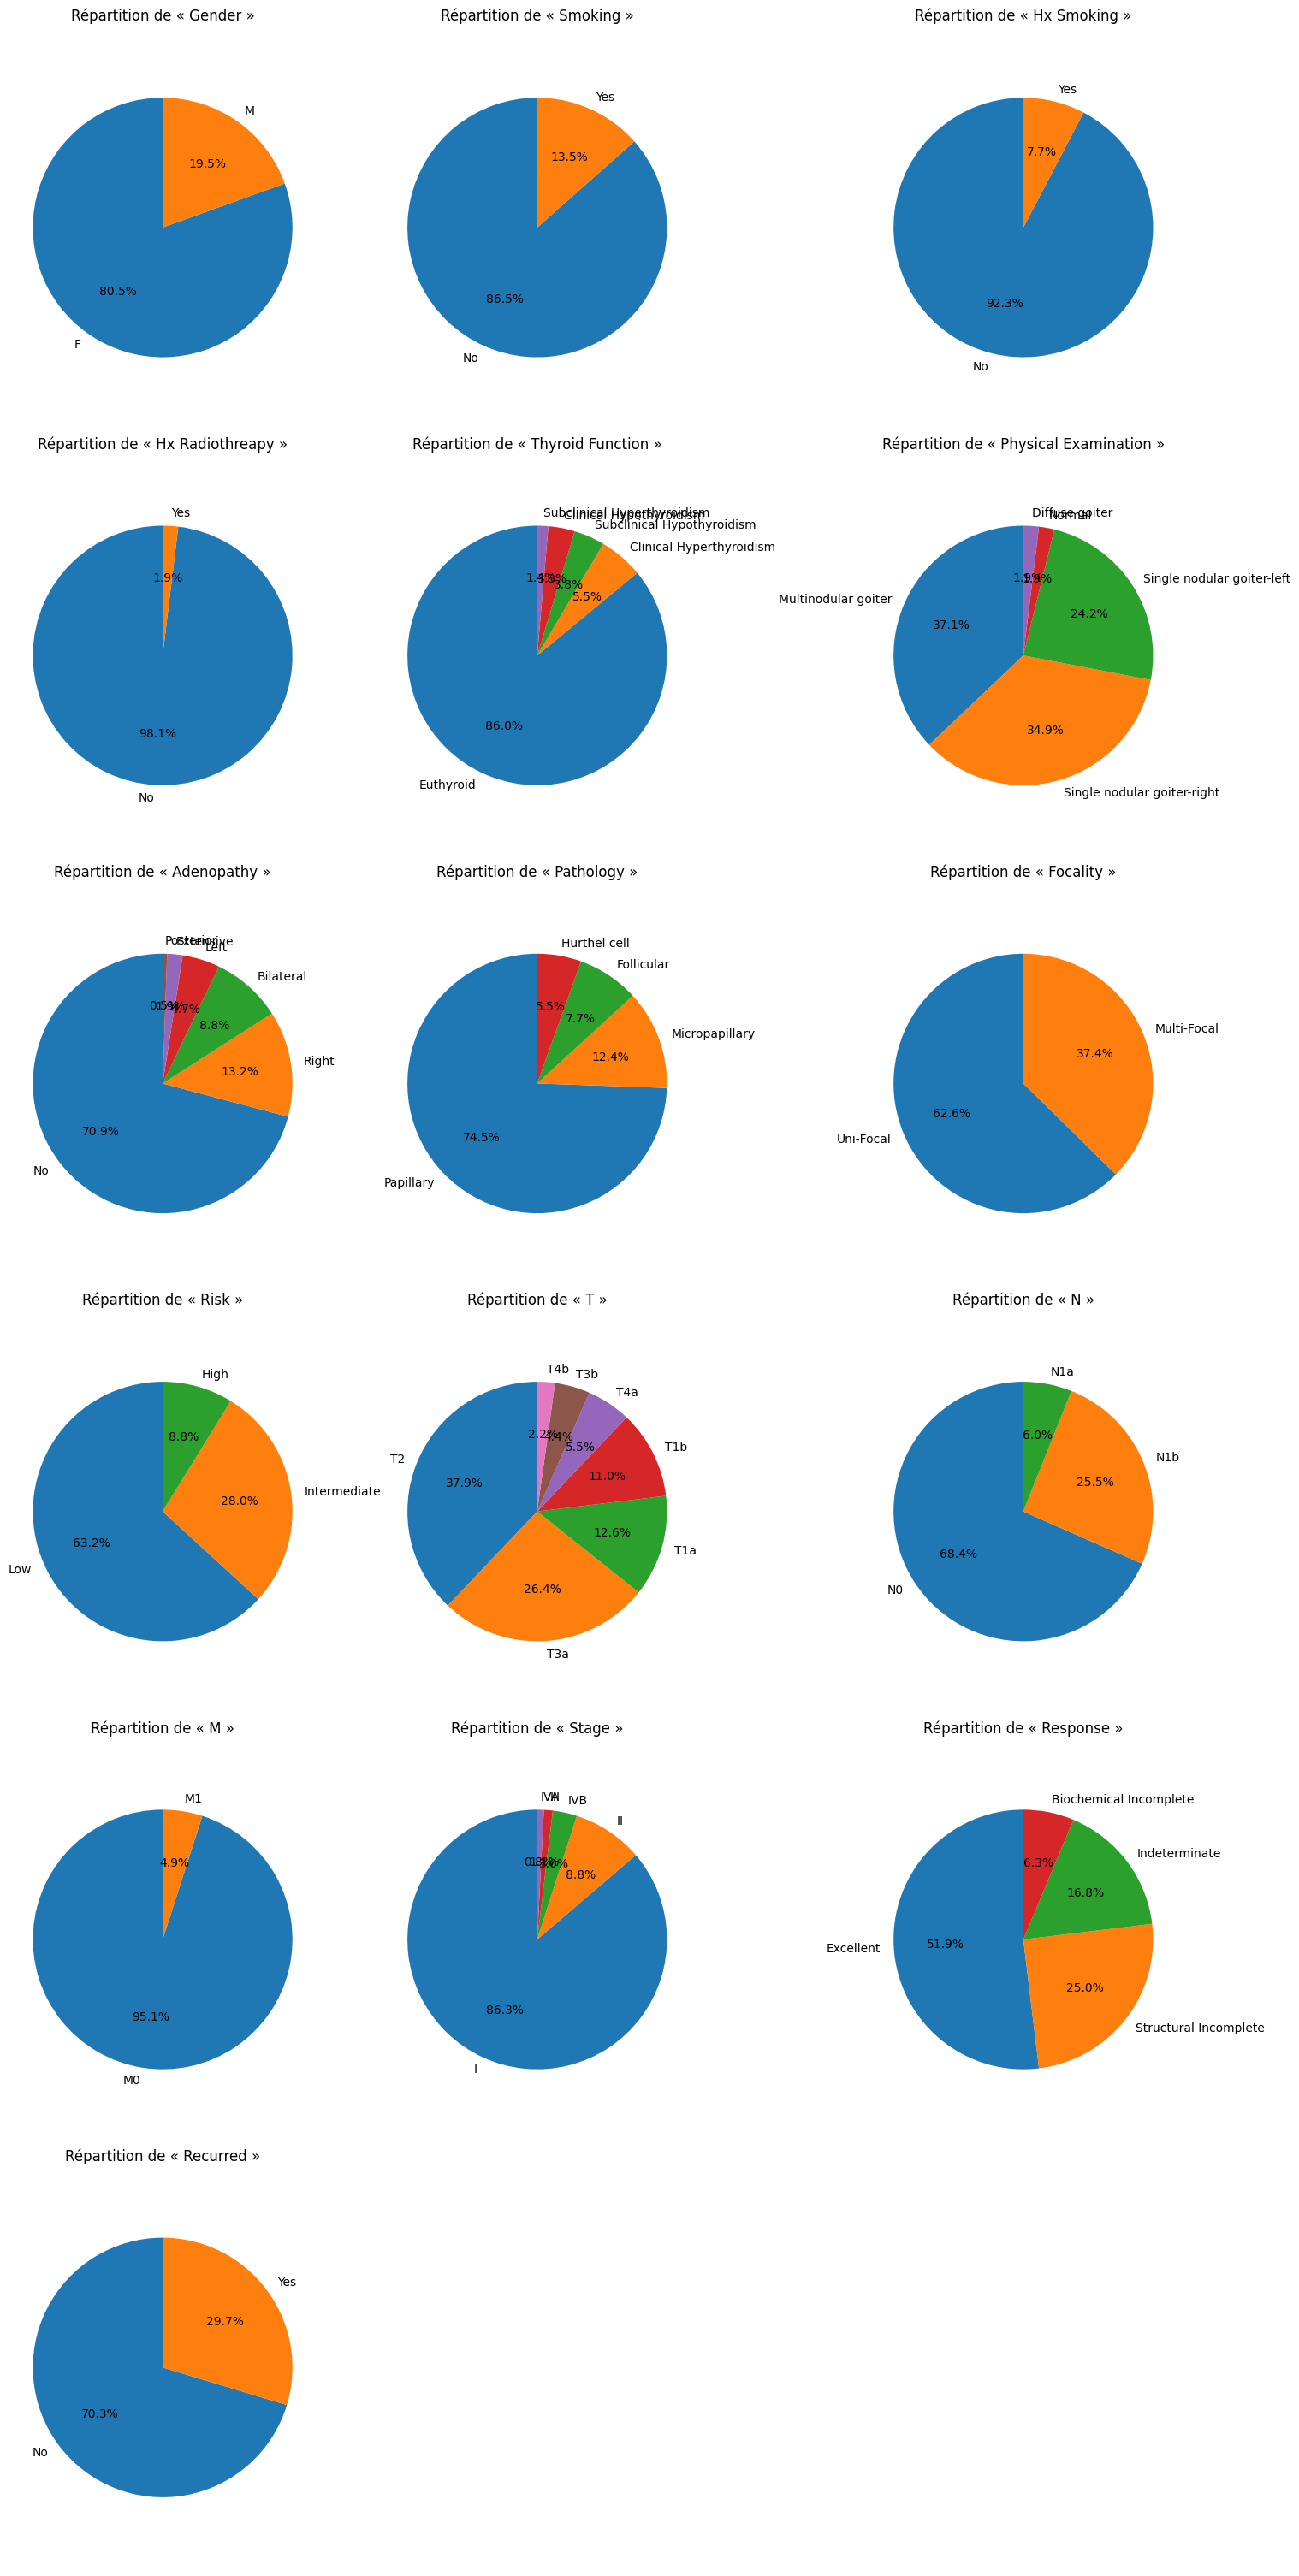

In [43]:
# pie chart pour chaque variable catégorielle
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# 2. Configuration de la figure et de la grille de sous‐plots
n_vars = len(cat_cols)
n_cols = 3  # nombre de graphiques par ligne
n_rows = int(np.ceil(n_vars / n_cols))

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(n_cols * 5, n_rows * 5),
    constrained_layout=True
)
axes = axes.flatten()

# 3. Boucle pour tracer un pie chart pour chaque variable catégorielle
for ax, col in zip(axes, cat_cols):
    counts = df[col].value_counts()
    labels = counts.index
    sizes = counts.values

    ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90
    )
    ax.axis('equal')
    ax.set_title(f"Répartition de « {col} »", fontsize=12)

# Suppression des axes restants si n_rows * n_cols > n_vars
for empty_ax in axes[n_vars:]:
    fig.delaxes(empty_ax)

# 4. Affichage final
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16876\3202068230.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\HP\AppData\Local\Temp\ipykernel_16876\3202068230.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\HP\AppData\Local\Temp\ipykernel_16876\3202068230.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\HP\AppData\Local\Temp\ipykernel_16876\3202068230.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




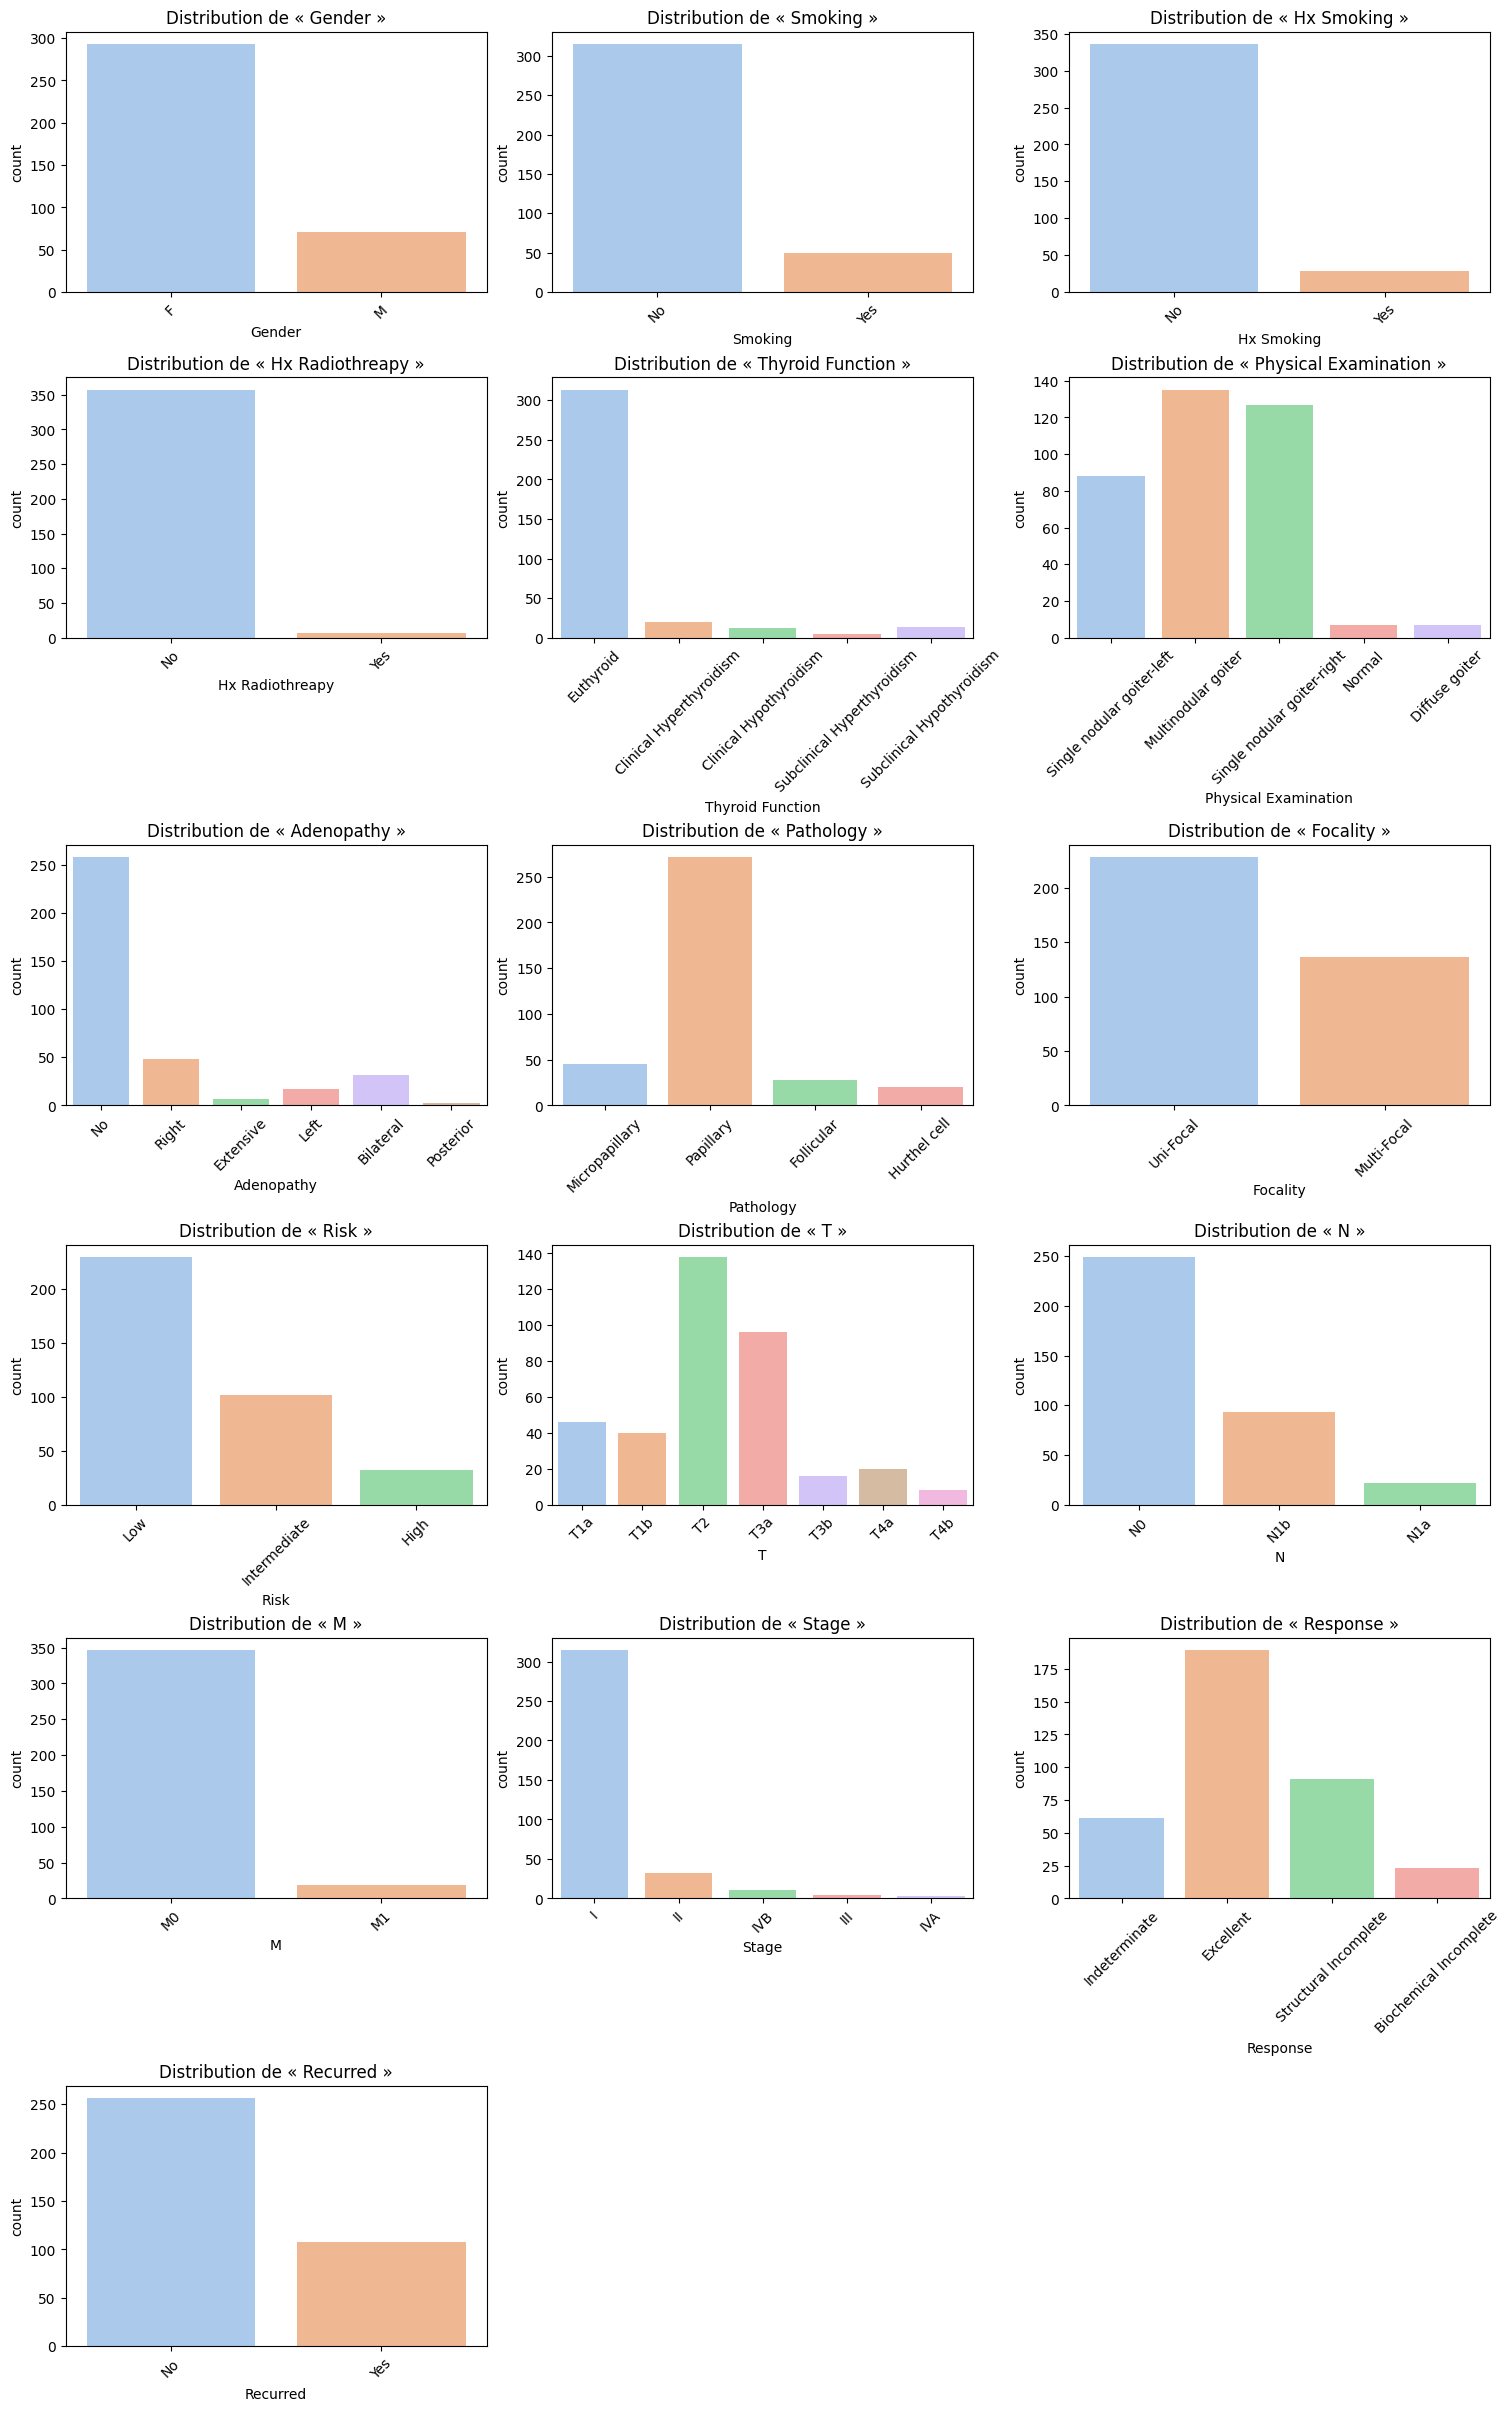

In [44]:
# barplot pour chaque variable catégorielle
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# 2. Configuration de la figure et de la grille de sous‐plots
n_vars = len(cat_cols)
n_cols = 3  # nombre de graphiques par ligne
n_rows = int(np.ceil(n_vars / n_cols))

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(n_cols * 5, n_rows * 4),
    constrained_layout=True
)
axes = axes.flatten()

# 3. Boucle pour tracer un barplot (countplot) pour chaque variable catégorielle
for ax, col in zip(axes, cat_cols):
    sns.countplot(x=col, data=df, ax=ax, palette="pastel")
    ax.set_title(f"Distribution de « {col} »", fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=10)

# Suppression des axes restants si n_rows * n_cols > n_vars
for empty_ax in axes[n_vars:]:
    fig.delaxes(empty_ax)

# 4. Affichage final
plt.show()

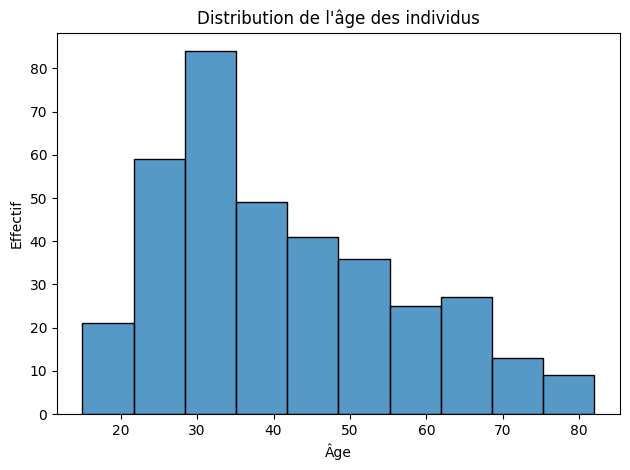

In [45]:
# histogramme variable numerique
# Tracé de l'histogramme
ax = sns.histplot(
    data=df,           # DataFrame contenant la colonne Age
    x="Age",           # Variable à tracer
    bins=10,           # Nombre de classes
    kde=False,         # Désactivation de la courbe de densité
    stat="count"       # Affiche les effectifs (par défaut)
)

# Personnalisation
ax.set_title("Distribution de l'âge des individus")
ax.set_xlabel("Âge")
ax.set_ylabel("Effectif")

plt.tight_layout()
plt.show()

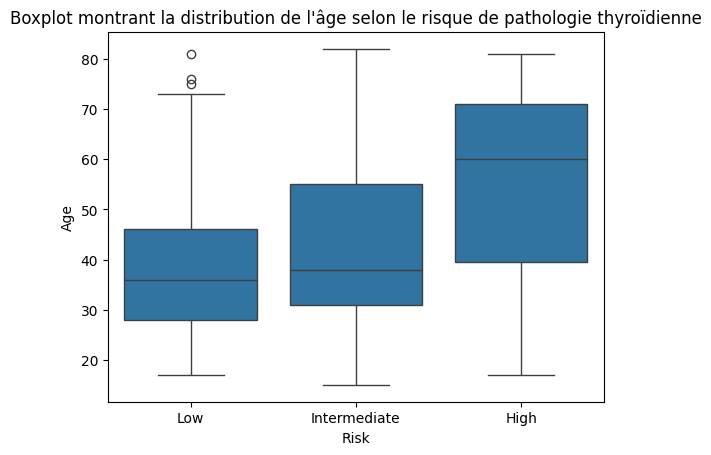

In [46]:
# statistiques bivariées
# boxplot entre la variable cible et la variable Age
sns.boxplot(x="Risk", y="Age", data=df)
plt.title("Boxplot montrant la distribution de l'âge selon le risque de pathologie thyroïdienne")
plt.show()

<Axes: xlabel='Smoking', ylabel='count'>

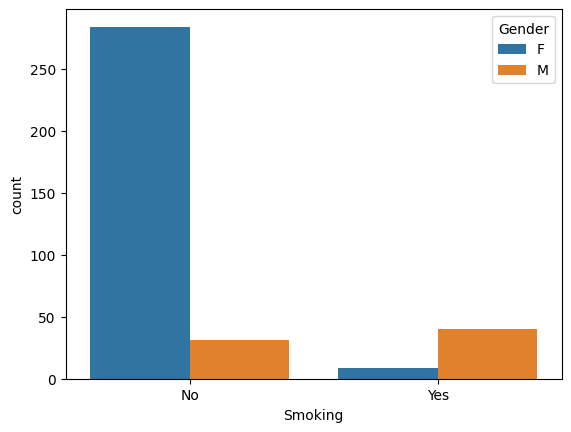

In [47]:
# barplot entre la variable smoking et gender
sns.countplot(x="Smoking", hue="Gender", data=df)

Text(0.5, 1.0, 'Diagramme en barre empilé entre le risque de pathologie thyroïdienne et le tabagisme')

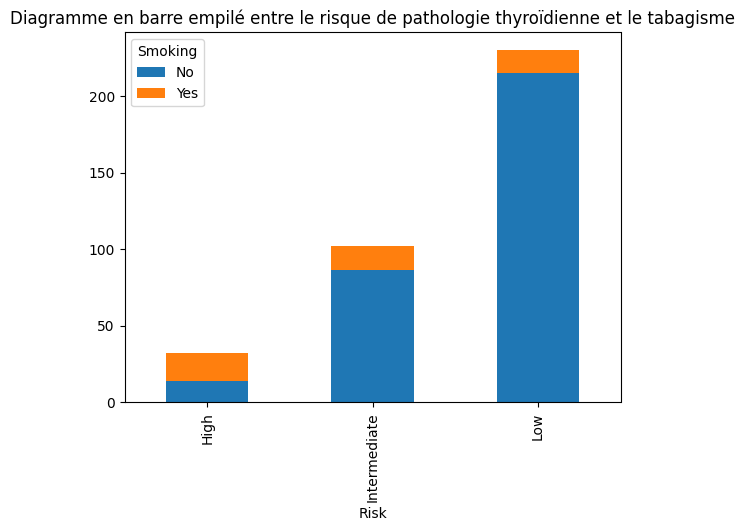

In [48]:
# diagramme en barre empilé entre smoking et Risk
ct = pd.crosstab(df["Risk"], df["Smoking"])
ct.plot(kind="bar", stacked=True)
plt.title("Diagramme en barre empilé entre le risque de pathologie thyroïdienne et le tabagisme")

<Axes: xlabel='Adenopathy', ylabel='Physical Examination'>

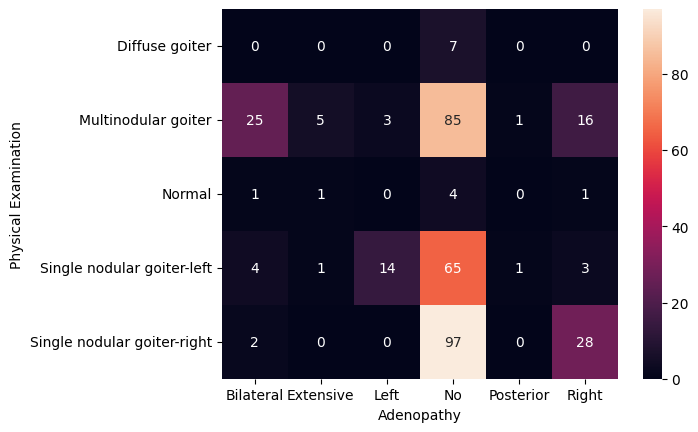

In [49]:
# heatmap contingency table entre Physical Examination et Adenopathy
ct = pd.crosstab(df["Physical Examination"], df["Adenopathy"])
sns.heatmap(ct, annot=True, fmt="d")

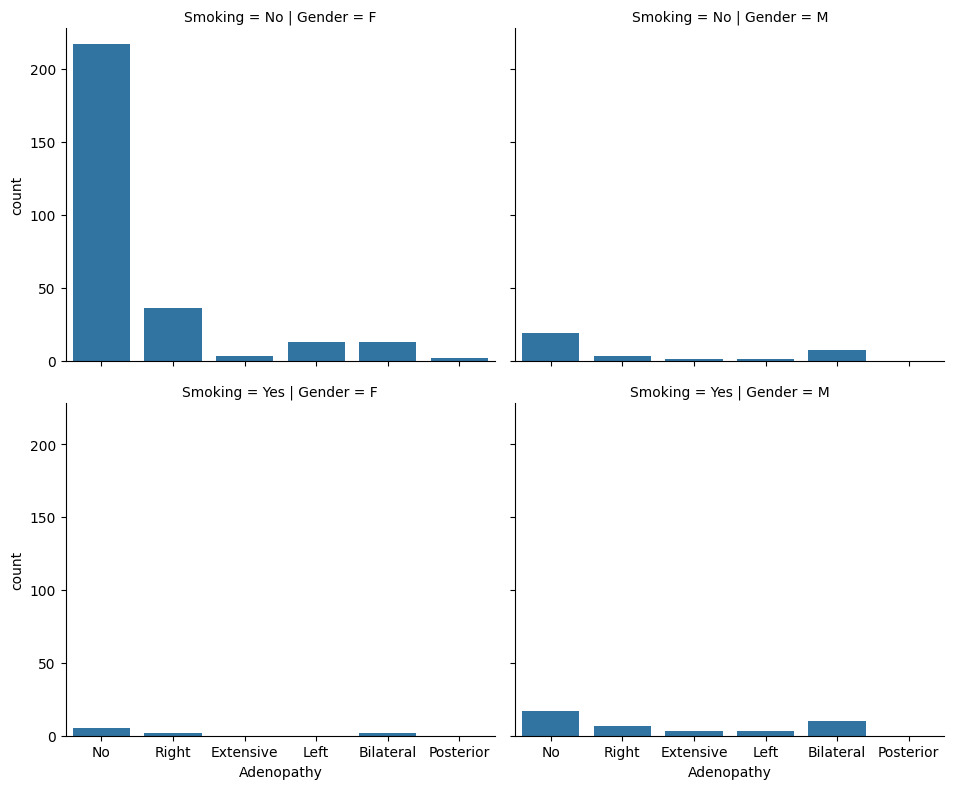

In [50]:
# catplot entre Adenopathy, smoking et gender
sns.catplot(
    data=df, x="Adenopathy",
    col="Gender", row="Smoking",
    kind="count",
    height=4, aspect=1.2
)

In [75]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Encoder les variables catégorielles
label_encoders = {}
df_encoded = df.copy()
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Séparer les variables explicatives et la cible
X = df_encoded.drop(columns=['Risk'])
y = df_encoded['Risk']

# Effectuer le test de Khi-2
chi2_scores, p_values = chi2(X, y)

# Créer un DataFrame pour afficher les résultats
results = pd.DataFrame({
    'Variable': X.columns,
    'Chi2': chi2_scores,
    'p-value': p_values
}).sort_values(by='Chi2', ascending=False)

print(results)

                Variable        Chi2        p-value
13                 Stage  465.747040  7.316699e-102
11                     N  257.835911   1.027172e-56
0                    Age  197.001514   1.665961e-43
12                     M  144.570806   4.044346e-32
10                     T  143.442156   7.111014e-32
15              Recurred  137.305497   1.529291e-30
14              Response   72.005256   2.313435e-16
2                Smoking   52.125624   4.798047e-12
4        Hx Radiothreapy   51.726087   5.858992e-12
9               Focality   26.890449   1.448149e-06
1                 Gender   23.567781   7.626433e-06
3             Hx Smoking    9.229609   9.904120e-03
6   Physical Examination    8.646985   1.325352e-02
7             Adenopathy    6.038820   4.883001e-02
5       Thyroid Function    0.616502   7.347307e-01
8              Pathology    0.376177   8.285412e-01


In [77]:
# Sélection des 14 meilleures variables pertinentes selon le test de Khi-2
top_14_variables = results.nlargest(14, 'Chi2')['Variable'].tolist()

# Affichage des variables sélectionnées
print(top_14_variables)

['Stage', 'N', 'Age', 'M', 'T', 'Recurred', 'Response', 'Smoking', 'Hx Radiothreapy', 'Focality', 'Gender', 'Hx Smoking', 'Physical Examination', 'Adenopathy']


In [78]:
# Encoder les 14 variables sélectionnées et la variable Risk avec One Hot Encoding
df_encoded = pd.get_dummies(df[top_14_variables + ['Risk']], dtype='int')

# Affichage du DataFrame encodé
df_encoded

,Age,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,N_N0,N_N1a,N_N1b,M_M0,...,Physical Examination_Single nodular goiter-right,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Risk_High,Risk_Intermediate,Risk_Low
0,27,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,34,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,30,1,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3,62,1,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
4,62,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
379,81,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
380,72,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
381,61,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0


In [79]:
# Définir les features X et la target y
X = df_encoded.drop(columns=['Risk_High', 'Risk_Intermediate', 'Risk_Low'])
y = df_encoded[['Risk_High', 'Risk_Intermediate', 'Risk_Low']]

In [80]:
# decoupage des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# standardisation de la variable Age
scaler = StandardScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']])
X_test['Age'] = scaler.transform(X_test[['Age']])


In [82]:
# Convertir y_train et y_test en 1D array avec les classes correspondantes
y_train_1d = y_train.idxmax(axis=1)
y_test_1d = y_test.idxmax(axis=1)

# Entraîner un modèle de régression logistique
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train_1d)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test_1d, y_pred))
print("Classification Report:\n", classification_report(y_test_1d, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_1d, y_pred))

Accuracy: 0.8493150684931506
Classification Report:
                    precision    recall  f1-score   support

        Risk_High       0.60      0.50      0.55         6
Risk_Intermediate       0.81      0.62      0.70        21
         Risk_Low       0.88      1.00      0.94        46

         accuracy                           0.85        73
        macro avg       0.77      0.71      0.73        73
     weighted avg       0.84      0.85      0.84        73

Confusion Matrix:
 [[ 3  3  0]
 [ 2 13  6]
 [ 0  0 46]]


In [83]:
# Entraîner un modèle SVC
svc_model = SVC(kernel='linear', probability=True, random_state=42)
svc_model.fit(X_train, y_train_1d)

# Faire des prédictions
y_pred_svc = svc_model.predict(X_test)

# Évaluation
print("Accuracy (SVC):", accuracy_score(y_test_1d, y_pred_svc))
print("Classification Report (SVC):\n", classification_report(y_test_1d, y_pred_svc))
print("Confusion Matrix (SVC):\n", confusion_matrix(y_test_1d, y_pred_svc))

Accuracy (SVC): 0.8904109589041096
Classification Report (SVC):
                    precision    recall  f1-score   support

        Risk_High       0.80      0.67      0.73         6
Risk_Intermediate       0.84      0.76      0.80        21
         Risk_Low       0.92      0.98      0.95        46

         accuracy                           0.89        73
        macro avg       0.85      0.80      0.82        73
     weighted avg       0.89      0.89      0.89        73

Confusion Matrix (SVC):
 [[ 4  2  0]
 [ 1 16  4]
 [ 0  1 45]]


In [84]:

# Sauvegarder le modèle SVC
joblib.dump(svc_model, 'model_final.joblib')

['model_final.joblib']

In [85]:
print(df_encoded.columns)

Index(['Age', 'Stage_I', 'Stage_II', 'Stage_III', 'Stage_IVA', 'Stage_IVB',
       'N_N0', 'N_N1a', 'N_N1b', 'M_M0', 'M_M1', 'T_T1a', 'T_T1b', 'T_T2',
       'T_T3a', 'T_T3b', 'T_T4a', 'T_T4b', 'Recurred_No', 'Recurred_Yes',
       'Response_Biochemical Incomplete', 'Response_Excellent',
       'Response_Indeterminate', 'Response_Structural Incomplete',
       'Smoking_No', 'Smoking_Yes', 'Hx Radiothreapy_No',
       'Hx Radiothreapy_Yes', 'Focality_Multi-Focal', 'Focality_Uni-Focal',
       'Gender_F', 'Gender_M', 'Hx Smoking_No', 'Hx Smoking_Yes',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Risk_High', 'Risk_Intermediate', 'Risk_Low

In [86]:
df_encoded.rename(columns={
    'Age': 'Âge',
    'Stage_I': 'Stade_I',
    'Stage_II': 'Stade_II',
    'Stage_III': 'Stade_III',
    'Stage_IVA': 'Stade_IVA',
    'Stage_IVB': 'Stade_IVB',
    'N_N0': 'N_N0',
    'N_N1a': 'N_N1a',
    'N_N1b': 'N_N1b',
    'M_M0': 'M_M0',
    'M_M1': 'M_M1',
    'T_T1a': 'T_T1a',
    'T_T1b': 'T_T1b',
    'T_T2': 'T_T2',
    'T_T3a': 'T_T3a',
    'T_T3b': 'T_T3b',
    'T_T4a': 'T_T4a',
    'T_T4b': 'T_T4b',
    'Recurred_No': 'Récidive_Non',
    'Recurred_Yes': 'Récidive_Oui',
    'Response_Biochemical Incomplete': 'Réponse_Biochimique Incomplète',
    'Response_Excellent': 'Réponse_Excellente',
    'Response_Indeterminate': 'Réponse_Indéterminée',
    'Response_Structural Incomplete': 'Réponse_Structurale Incomplète',
    'Smoking_No': 'Tabagisme_Non',
    'Smoking_Yes': 'Tabagisme_Oui',
    'Hx Radiothreapy_No': 'Antécédents Radiothérapie_Non',
    'Hx Radiothreapy_Yes': 'Antécédents Radiothérapie_Oui',
    'Focality_Multi-Focal': 'Focalité_Multi-Focale',
    'Focality_Uni-Focal': 'Focalité_Uni-Focale',
    'Gender_F': 'Sexe_F',
    'Gender_M': 'Sexe_M',
    'Hx Smoking_No': 'Antécédents Tabagisme_Non',
    'Hx Smoking_Yes': 'Antécédents Tabagisme_Oui',
    'Physical Examination_Diffuse goiter': 'Examen Physique_Goître Diffus',
    'Physical Examination_Multinodular goiter': 'Examen Physique_Goître Multinodulaire',
    'Physical Examination_Normal': 'Examen Physique_Normal',
    'Physical Examination_Single nodular goiter-left': 'Examen Physique_Goître Nodulaire Unique-Gauche',
    'Physical Examination_Single nodular goiter-right': 'Examen Physique_Goître Nodulaire Unique-Droite',
    'Adenopathy_Bilateral': 'Adénopathie_Bilatérale',
    'Adenopathy_Extensive': 'Adénopathie_Étendue',
    'Adenopathy_Left': 'Adénopathie_Gauche',
    'Adenopathy_No': 'Adénopathie_Non',
    'Adenopathy_Posterior': 'Adénopathie_Postérieure',
    'Adenopathy_Right': 'Adénopathie_Droite',
    'Risk_High': 'Risque_Élevé',
    'Risk_Intermediate': 'Risque_Intermédiaire',
    'Risk_Low': 'Risque_Faible'
}, inplace=True)

In [87]:
print(df_encoded.columns)

Index(['Âge', 'Stade_I', 'Stade_II', 'Stade_III', 'Stade_IVA', 'Stade_IVB',
       'N_N0', 'N_N1a', 'N_N1b', 'M_M0', 'M_M1', 'T_T1a', 'T_T1b', 'T_T2',
       'T_T3a', 'T_T3b', 'T_T4a', 'T_T4b', 'Récidive_Non', 'Récidive_Oui',
       'Réponse_Biochimique Incomplète', 'Réponse_Excellente',
       'Réponse_Indéterminée', 'Réponse_Structurale Incomplète',
       'Tabagisme_Non', 'Tabagisme_Oui', 'Antécédents Radiothérapie_Non',
       'Antécédents Radiothérapie_Oui', 'Focalité_Multi-Focale',
       'Focalité_Uni-Focale', 'Sexe_F', 'Sexe_M', 'Antécédents Tabagisme_Non',
       'Antécédents Tabagisme_Oui', 'Examen Physique_Goître Diffus',
       'Examen Physique_Goître Multinodulaire', 'Examen Physique_Normal',
       'Examen Physique_Goître Nodulaire Unique-Gauche',
       'Examen Physique_Goître Nodulaire Unique-Droite',
       'Adénopathie_Bilatérale', 'Adénopathie_Étendue', 'Adénopathie_Gauche',
       'Adénopathie_Non', 'Adénopathie_Postérieure', 'Adénopathie_Droite',
       'Risque_Éle